In [139]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

## Analyzing New York Times Top Stories

### Motivation:
The goal of this project is to analyze the top stories provided by the New York Times API to gain insights into popular news topics and trends.


### Methodology:
1. Retrieve data from the New York Times Top Stories API.
2. Perform data transformation to convert publication dates to a usable format.
3. Conduct statistical analysis to understand the distribution of articles across sections.
4. Visualize the findings to communicate insights effectively.


# Define your New York Times API key

In [140]:
api_key = "nW5eKn4mHjwnLXGZg1FrtwjGTtLAjzq0"

# Define the endpoint URL for the Top Stories API

In [141]:
url = f"https://api.nytimes.com/svc/topstories/v2/home.json?api-key={api_key}"


In [142]:
try:
   
    response = requests.get(url)
    response.raise_for_status()  
    
   
    data = response.json()
    print(data)  # Print the response data
    
except requests.exceptions.RequestException as e:
    print("Error:", e)
    
except Exception as e:
    print("An unexpected error occurred:", e)
    

{'status': 'OK', 'copyright': 'Copyright (c) 2024 The New York Times Company. All Rights Reserved.', 'section': 'home', 'last_updated': '2024-04-22T20:38:03-04:00', 'num_results': 26, 'results': [{'section': 'nyregion', 'subsection': '', 'title': 'An Unprecedented Trial Opens With Two Visions of Trump', 'abstract': 'The prosecution’s opening statement sketched a seamy scheme meant to further the election of Donald J. Trump. His lawyer said the government’s case is merely “34 pieces of paper.”', 'url': 'https://www.nytimes.com/2024/04/22/nyregion/trump-hush-money-trial-prosecution.html', 'uri': 'nyt://article/83212189-709e-57ab-ba85-38a603cb8a07', 'byline': 'By Jonah E. Bromwich and Ben Protess', 'item_type': 'Article', 'updated_date': '2024-04-22T17:51:58-04:00', 'created_date': '2024-04-22T15:50:38-04:00', 'published_date': '2024-04-22T15:50:38-04:00', 'material_type_facet': '', 'kicker': '', 'des_facet': ['Frauds and Swindling', 'New York State Criminal Case Against Trump (71543-23)'

# Convert the response to JSON format  

In [143]:
 data = response.json()

# Extract relevant information from the response

In [144]:
 articles = data['results']

# Perform data transformation: Convert publication date to datetime object

In [145]:
for article in articles:
    article['published_date'] = datetime.strptime(article['published_date'], "%Y-%m-%dT%H:%M:%S%z")
    

# Create a DataFrame for easier analysis

In [146]:
df = pd.DataFrame(articles)

# Perform statistical analysis: Calculate summary statistics

In [147]:
summary_stats = df.groupby('section')['section'].count().describe()
print("Summary Statistics of Number of Articles per Section:")
print(summary_stats)

Summary Statistics of Number of Articles per Section:
count    11.000000
mean      2.363636
std       2.730301
min       1.000000
25%       1.000000
50%       1.000000
75%       2.500000
max      10.000000
Name: section, dtype: float64


# Perform statistical analysis: Visualize the distribution of articles across sections

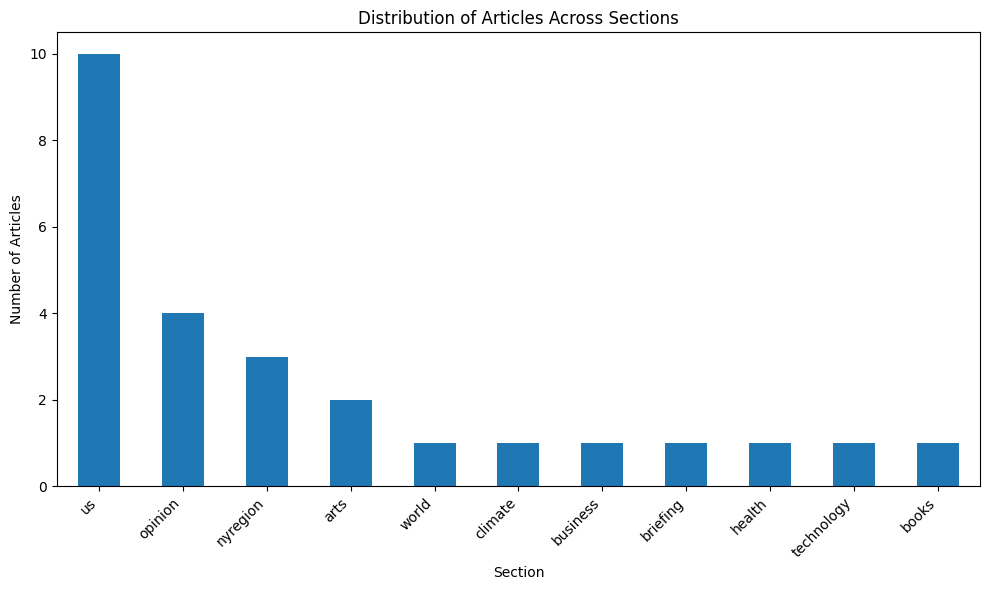

In [148]:
plt.figure(figsize=(10, 6))
df['section'].value_counts().plot(kind='bar')
plt.xlabel('Section')
plt.ylabel('Number of Articles')
plt.title('Distribution of Articles Across Sections')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print insights and conclusions

In [149]:
print("\nInsights:")
print("The most common sections are:", df['section'].mode().tolist())


Insights:
The most common sections are: ['us']


In [150]:
try:
    pass  # Placeholder for the code that may raise an exception
except requests.exceptions.RequestException as e:
    # Handle HTTP errors or network errors
    print("Error:", e)
except Exception as e:
    # Handle any other unexpected errors
    print("An unexpected error occurred:", e)


### Findings:
- The most common sections are Us and Opinion.
- There is a wide distribution of articles across sections, with some sections having significantly more articles than others.